In [1]:
import torch
print(torch.__version__)
print("CUDA Available: ", torch.cuda.is_available())

2.4.0
CUDA Available:  False


In [2]:
import tensorflow as tf
print(tf.__version__)

2.10.0


### load data using tensorflow\keras

In [7]:
import tensorflow as tf

### data sets 

In [8]:
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 1005s 6us/step


### data preprocessing 

In [9]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize images
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One-hot encode labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Data augmentation for training data
datagen = ImageDataGenerator(
    rotation_range=20,          # Random rotations
    width_shift_range=0.2,      # Random horizontal shifts
    height_shift_range=0.2,     # Random vertical shifts
    shear_range=0.2,            # Random shearing
    zoom_range=0.2,             # Random zoom
    horizontal_flip=True,       # Random horizontal flips
    fill_mode='nearest'         # Fill missing pixels
)

# Fit the generator to the training data
datagen.fit(train_images)

# Create generators for training and validation
train_generator = datagen.flow(train_images, train_labels, batch_size=32)


### data visulization

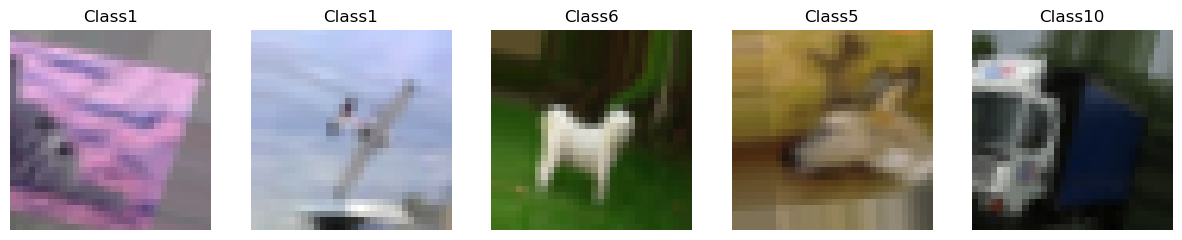

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images(images, labels, class_names, num_images=5):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
    plt.show()

# Define class names manually if they are not available
class_names = ['Class1', 'Class2', 'Class3', 'Class4', 'Class5', 
                'Class6', 'Class7', 'Class8', 'Class9', 'Class10']  # Replace with your actual class names

# Get a batch of images and labels
images, labels = next(datagen.flow(train_images, train_labels, batch_size=5))

# Visualize the images
plot_images(images, labels, class_names)


### model building

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define a basic CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Adjust the number of classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Load pre-trained VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)  # Adjust the number of classes

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of VGG16
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


58889256/58889256 [==============================] - 14s 0us/step


### train the model

In [19]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize images
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One-hot encode labels
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Define data augmentation for training
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define data augmentation for validation (usually just rescaling)
val_datagen = ImageDataGenerator()

# Create the training data generator
train_generator = train_datagen.flow(
    train_images, 
    train_labels, 
    batch_size=32
)

# Create the validation data generator
val_generator = val_datagen.flow(
    test_images, 
    test_labels, 
    batch_size=32
)

# Define your model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # CIFAR-10 images are 32x32
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.7586 - accuracy: 0.3441 - val_loss: 1.3220 - val_accuracy: 0.5197
Epoch 2/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.4772 - accuracy: 0.4687 - val_loss: 1.2733 - val_accuracy: 0.5357
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.3599 - accuracy: 0.5135 - val_loss: 1.1341 - val_accuracy: 0.5997
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2844 - accuracy: 0.5442 - val_loss: 1.0293 - val_accuracy: 0.6336
Epoch 5/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2255 - accuracy: 0.5662 - val_loss: 0.9893 - val_accuracy: 0.6476
Epoch 6/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1926 - accuracy: 0.5792 - val_loss: 0.9610 - val_accuracy: 0.6676
Epoch 7/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1566 - accuracy: 0.5951 - val_loss: 0.9694 -

### model evaluvation

In [20]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(val_generator)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')


313/313 [==============================] - 2s 5ms/step - loss: 0.8859 - accuracy: 0.6895
Test accuracy: 0.6894999742507935
Test loss: 0.8858736157417297


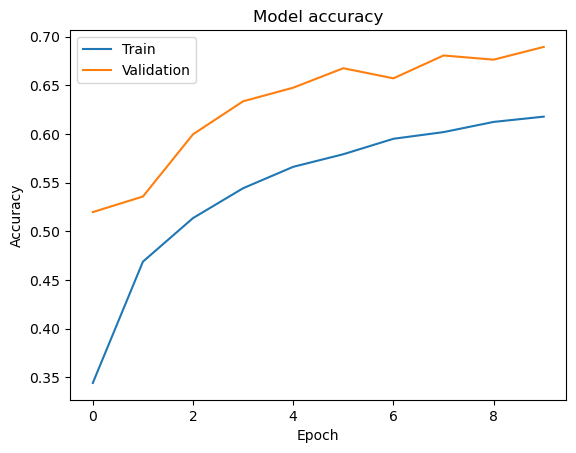

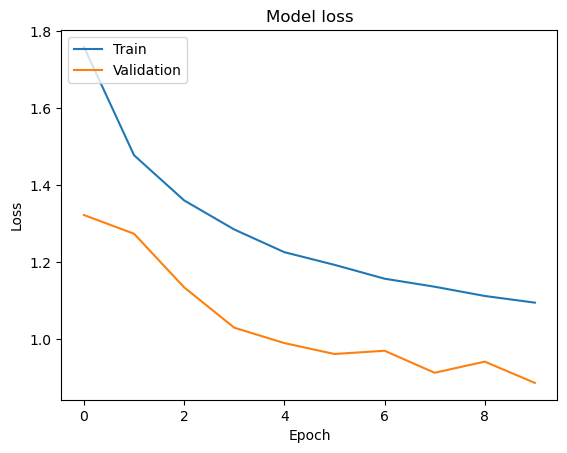

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [22]:
# Save the model to a file
model.save('cifar10_model.h5')

In [23]:
# Predict on new images
predictions = model.predict(test_images)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Example: Print some predictions
for i in range(5):
    print(f"True label: {true_classes[i]}, Predicted label: {predicted_classes[i]}")


313/313 [==============================] - 1s 4ms/step
True label: 3, Predicted label: 3
True label: 8, Predicted label: 8
True label: 8, Predicted label: 8
True label: 0, Predicted label: 0
True label: 6, Predicted label: 6


#### model done ----trying different things with it

import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt

def predict_image(model, img_path, class_labels):
    # Load the image
    img = image.load_img(img_path, target_size=(32, 32))  # CIFAR-10 images are 32x32
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array.astype('float32') / 255.0  # Normalize

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    class_label = class_labels[predicted_class]
    
    # Display the image and prediction
    plt.imshow(img)
    plt.title(f'Predicted: {class_label}')
    plt.axis('off')
    plt.show()
    
    return class_label

# CIFAR-10 class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Example usage
img_path = 'path_to_your_image.jpg'  # Replace with your image path
predicted_label = predict_image(model, img_path, class_labels)
print(f'Predicted label: {predicted_label}')


In [26]:
train_images

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [27]:
test_images

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [28]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [31]:
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [34]:
print(f"Type of labels: {type(train_labels)}")
print(f"Sample labels: {train_labels[:5]}")
print(f"Sample labels data type: {train_labels.dtype}")

Type of labels: <class 'numpy.ndarray'>
Sample labels: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Sample labels data type: float32


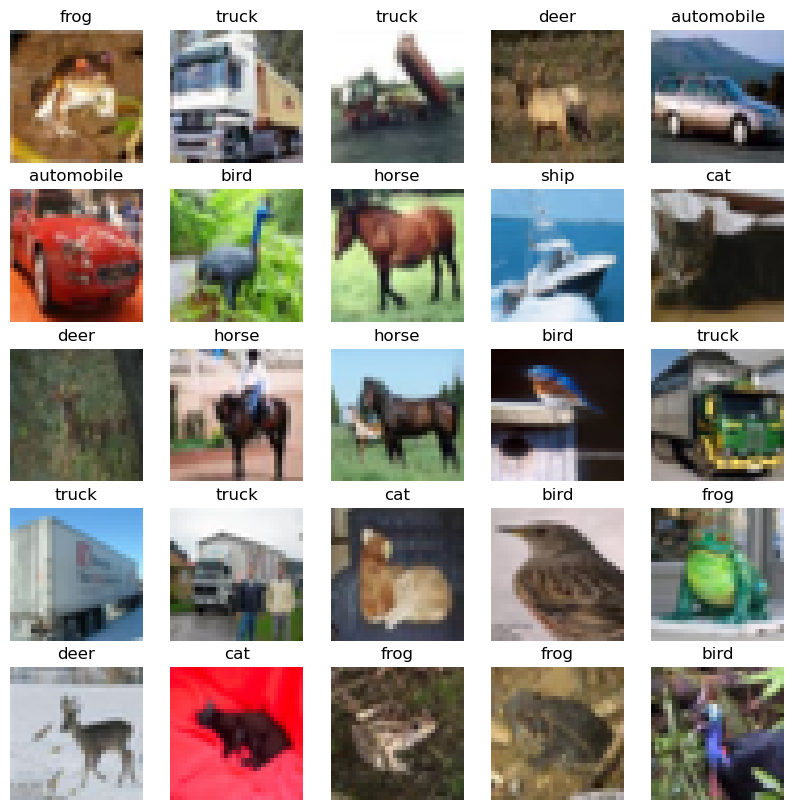

In [35]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images(images, labels, class_labels, num_images=25):
    plt.figure(figsize=(10, 10))
    
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        
        # Convert one-hot encoded label to index
        label_index = np.argmax(labels[i])
        plt.title(class_labels[label_index])
        
        plt.axis('off')
    
    plt.show()

# Visualize some training images
plot_images(train_images, train_labels, class_labels)


In [36]:
# Check the shape and a sample of train_labels
print(f"Shape of train_labels: {train_labels.shape}")
print(f"Sample of train_labels: {train_labels[:5]}")

# Check class_labels
print(f"Class labels: {class_labels}")


Shape of train_labels: (50000, 10)
Sample of train_labels: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Class labels: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


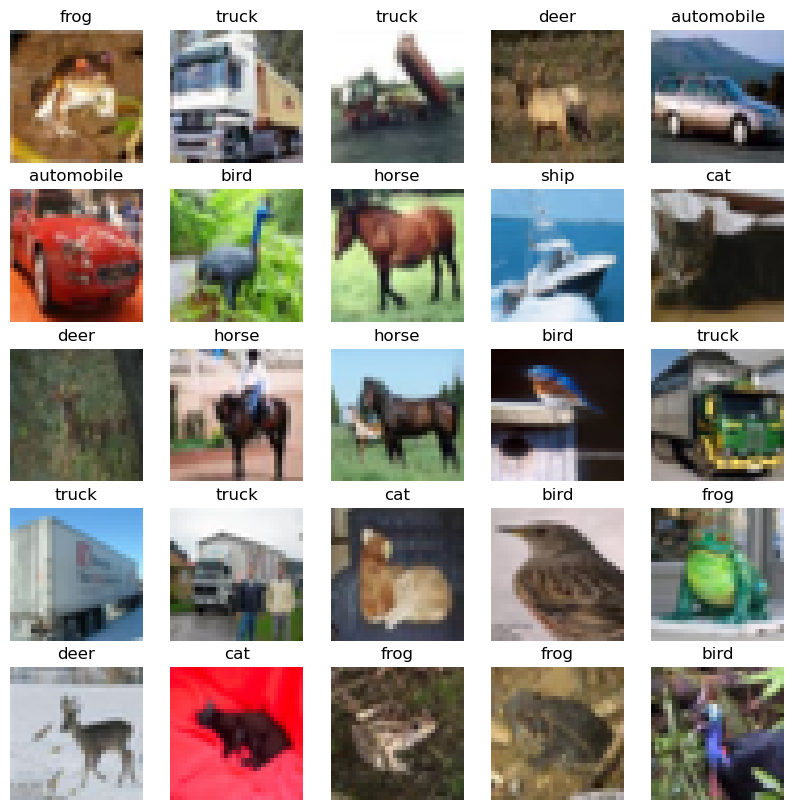

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images(images, labels, class_labels, num_images=25):
    plt.figure(figsize=(10, 10))
    
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        
        # Convert one-hot encoded label to index
        label_index = np.argmax(labels[i])
        plt.title(class_labels[label_index])
        
        plt.axis('off')
    
    plt.show()

# Visualize some training images
plot_images(train_images, train_labels, class_labels)


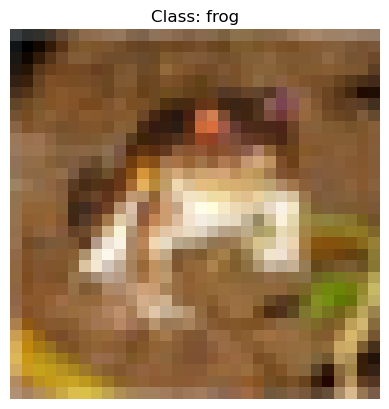

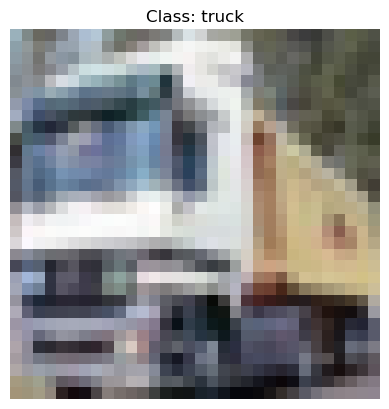

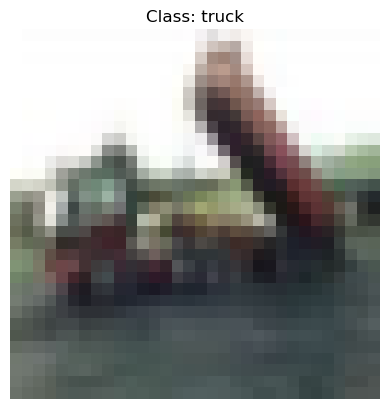

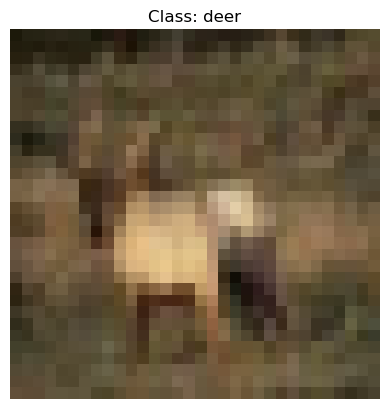

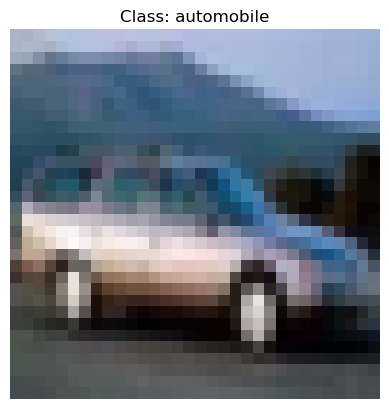

In [38]:
def print_image_samples(images, labels, class_labels, num_samples=5):
    for i in range(num_samples):
        img = images[i]
        label_index = np.argmax(labels[i])
        class_name = class_labels[label_index]
        plt.imshow(img)
        plt.title(f'Class: {class_name}')
        plt.axis('off')
        plt.show()

print_image_samples(train_images, train_labels, class_labels)
